In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import ast

/Users/arafathjazeeb/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/arafathjazeeb/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
main_df = pd.read_csv('reddit_opinion_PSE_ISR.csv', on_bad_lines='skip')

In [3]:
df = pd.read_csv('Senti_Pre_Processed.csv', on_bad_lines='skip')

In [5]:
df['subjectivity_category'] = pd.cut(df['text_subjectivity'], bins=[-1, 0.5, 1], labels=['Factuated', 'Opinionated'], right=False)

In [6]:
df.head()

,created_time,post_created_time,subreddit,text,text_polarity,text_subjectivity,text_category,subjectivity_category
0,2024-03-19 19:18:08,2024-03-19 17:48:02,IsraelPalestine,is supposed to prove nobody in gaza has any wa...,0.025847,0.504318,Positive,Opinionated
1,2024-03-19 19:17:51,2024-03-19 13:25:00,worldnews,if only there was armed military force nearby ...,0.100000,0.431250,Positive,Factuated
2,2024-03-19 19:17:35,2024-03-19 17:45:08,IsraelPalestine,taliban created and funded by america and isis...,0.084074,0.392340,Positive,Factuated
3,2024-03-19 19:17:25,2024-03-19 17:51:10,worldnews,recycling glass is still economical or particu...,0.173213,0.556354,Positive,Opinionated
4,2024-03-19 19:17:22,2024-03-19 19:00:41,worldnews,two a private direct communication line if any...,-0.146154,0.451282,Negative,Factuated


In [7]:
# Count the occurrences of each sentiment category
sentiment_counts = df['text_category'].value_counts()
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = ['text_polarity', 'Count']
sentiment_counts_df = sentiment_counts_df.sort_values(by='Count', ascending=False)
sentiment_counts_df.style.background_gradient(cmap='YlGnBu')

,text_polarity,Count
0,Positive,604836
1,Negative,313309
2,Neutral,169692


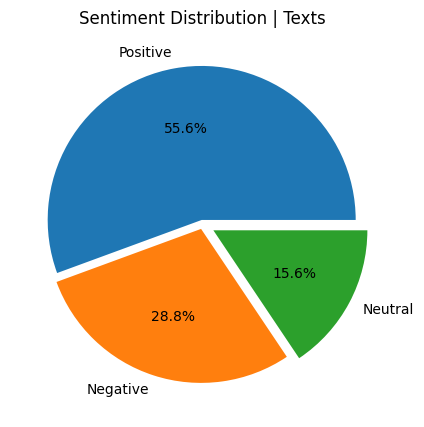

In [8]:
import plotly.graph_objects as go
fig = go.Figure(go.Funnelarea(
    text =sentiment_counts_df.text_polarity,
    values = sentiment_counts_df.Count,
    title = {"position": "top center"}
    ))
fig.update_layout(
    title="Funnel-Chart of Sentiment Distribution | Posts",
    title_x=0.5, width=500, height=400)
fig.show()


plt.figure(figsize=(5, 5))
ax = plt.pie(x =df['text_category'].value_counts() , labels=df['text_category'].value_counts().index, autopct = '%1.1f%%', explode = [0.03, 0.03, 0.08])
plt.title('Sentiment Distribution | Texts')
plt.show()

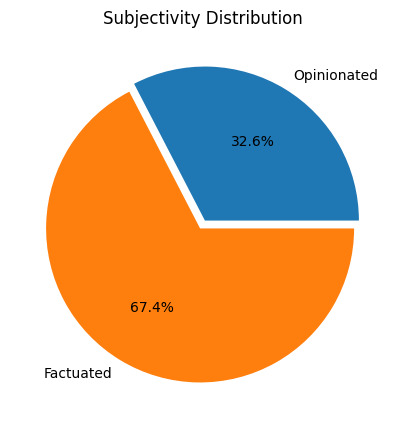

In [9]:
import matplotlib.pyplot as plt

# Filter DataFrame for 'Opinionated' and 'Factuated' categories
opinionated_count = df[df['subjectivity_category'] == 'Opinionated'].shape[0]
factuated_count = df[df['subjectivity_category'] == 'Factuated'].shape[0]

# Create pie chart
plt.figure(figsize=(5, 5))
plt.pie(x=[opinionated_count, factuated_count], labels=['Opinionated', 'Factuated'], autopct='%1.1f%%', explode=[0.03, 0.03])
plt.title('Subjectivity Distribution')
plt.show()


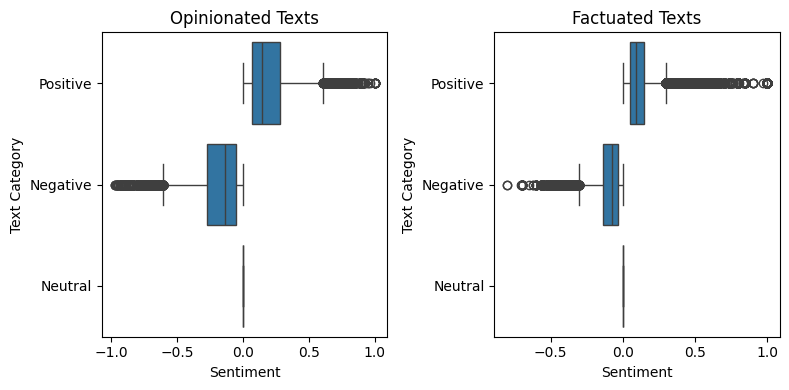

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'text_category', 'text_polarity', and 'subjectivity_category'

# Filter DataFrame for 'Opinionated' and 'Factuated' categories
opinionated_df = df[df['subjectivity_category'] == 'Opinionated']
factuated_df = df[df['subjectivity_category'] == 'Factuated']

# Create box plots for 'Opinionated' and 'Factuated' categories
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x='text_polarity', y='text_category', data=opinionated_df, order=['Positive', 'Negative', 'Neutral'])
plt.title('Opinionated Texts')
plt.xlabel('Sentiment')
plt.ylabel('Text Category')

plt.subplot(1, 2, 2)
sns.boxplot(x='text_polarity', y='text_category', data=factuated_df, order=['Positive', 'Negative', 'Neutral'])
plt.title('Factuated Texts')
plt.xlabel('Sentiment')
plt.ylabel('Text Category')

plt.tight_layout()
plt.show()


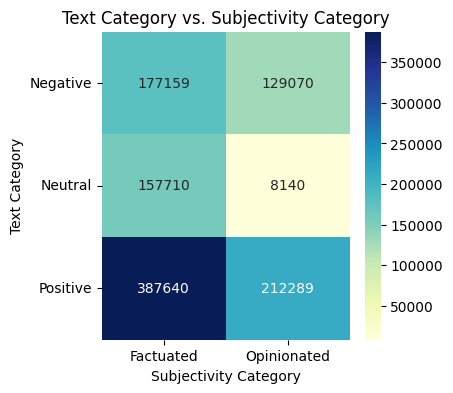

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'text_category' and 'subjectivity_category'

# Crosstab to get the frequency of combinations of text_category and subjectivity_category
cross_tab = pd.crosstab(df['text_category'], df['subjectivity_category'])

# Plot heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Text Category vs. Subjectivity Category')
plt.xlabel('Subjectivity Category')
plt.ylabel('Text Category')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()


In [12]:
df.head(1)

,created_time,post_created_time,subreddit,text,text_polarity,text_subjectivity,text_category,subjectivity_category
0,2024-03-19 19:18:08,2024-03-19 17:48:02,IsraelPalestine,is supposed to prove nobody in gaza has any wa...,0.025847,0.504318,Positive,Opinionated


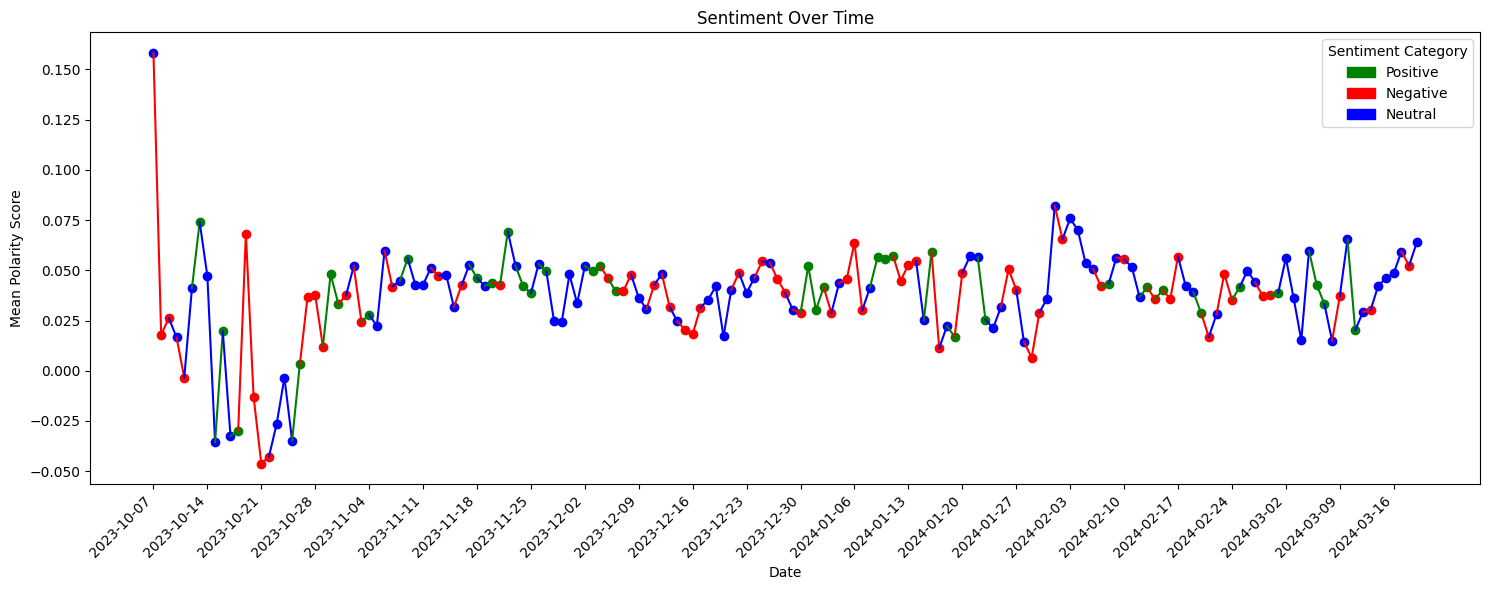

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Create legend patches
positive_patch = mpatches.Patch(color='green', label='Positive')
negative_patch = mpatches.Patch(color='red', label='Negative')
neutral_patch = mpatches.Patch(color='blue', label='Neutral')

# Convert 'created_time' column to datetime type with the correct format
df['created_time'] = pd.to_datetime(df['created_time'], format="%Y-%m-%d %H:%M:%S", errors='coerce')

# Group by 'created_time' and calculate the mean polarity for each time period
sentiment_by_time = df.groupby(df['created_time'].dt.date)['text_polarity'].mean()

# Calculate dynamic thresholds based on percentiles
percentile_25 = np.percentile(df['text_polarity'], 25)
percentile_75 = np.percentile(df['text_polarity'], 75)

# Classify sentiments based on dynamic thresholds
df['sentiment_category'] = np.where(
    df['text_polarity'] < percentile_25, 'Negative',
    np.where(df['text_polarity'] > percentile_75, 'Positive', 'Neutral'))

# Plot the sentiment over time with lines connecting points and different colors for each category
plt.figure(figsize=(15, 6))

for idx, row in sentiment_by_time.reset_index().iterrows():
    date = row['created_time']
    sentiment = df.loc[df['created_time'].dt.date == date, 'sentiment_category'].iloc[0]

    # Assign colors based on sentiment categories
    if sentiment == 'Positive':
        color = 'green'
    elif sentiment == 'Negative':
        color = 'red'
    else:
        color = 'blue'

    # Plot the point
    plt.plot(date, row['text_polarity'], marker='o', color=color)

    # Connect with lines to the previous point
    if idx > 0:
        plt.plot([previous_date, date], [previous_sentiment, row['text_polarity']], color=color)

    previous_date = date
    previous_sentiment = row['text_polarity']

# Add legend with colored boxes
plt.legend(handles=[positive_patch, negative_patch, neutral_patch], title='Sentiment Category')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Polarity Score')

# Display every 7th date on x-axis
ticks_to_show = sentiment_by_time.index[::7]
plt.xticks(ticks_to_show, rotation=45, ha='right')

plt.tight_layout()
plt.show()


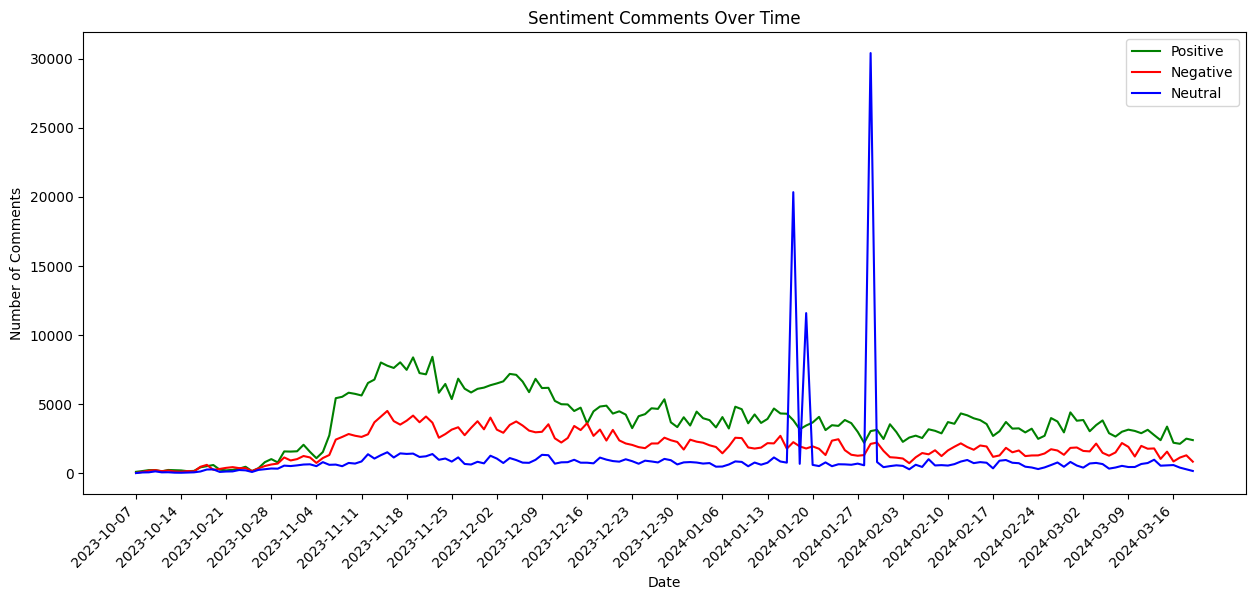

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter comments by sentiment category
positive_comment = df[df['text_category'] == 'Positive']
negative_comment = df[df['text_category'] == 'Negative']
neutral_comment = df[df['text_category'] == 'Neutral']

# Group by 'created_time' and calculate counts
positive_counts_per_day = positive_comment.groupby(positive_comment['created_time'].dt.date).size()
negative_counts_per_day = negative_comment.groupby(negative_comment['created_time'].dt.date).size()
neutral_counts_per_day = neutral_comment.groupby(neutral_comment['created_time'].dt.date).size()

plt.figure(figsize=(15, 6))

# Plot lines for each sentiment category
sns.lineplot(x=positive_counts_per_day.index, y=positive_counts_per_day.values, label='Positive', color='green')
sns.lineplot(x=negative_counts_per_day.index, y=negative_counts_per_day.values, label='Negative', color='red')
sns.lineplot(x=neutral_counts_per_day.index, y=neutral_counts_per_day.values, label='Neutral', color='blue')

plt.title('Sentiment Comments Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.legend()

# Display every 7th date on x-axis
ticks_to_show = positive_counts_per_day.index[::7]
plt.xticks(ticks_to_show, rotation=45, ha='right')

plt.show()


In [19]:
df.head()

,created_time,post_created_time,subreddit,text,text_polarity,text_subjectivity,text_category,subjectivity_category,sentiment_category
0,2024-03-19 19:18:08,2024-03-19 17:48:02,IsraelPalestine,is supposed to prove nobody in gaza has any wa...,0.025847,0.504318,Positive,Opinionated,Neutral
1,2024-03-19 19:17:51,2024-03-19 13:25:00,worldnews,if only there was armed military force nearby ...,0.100000,0.431250,Positive,Factuated,Neutral
2,2024-03-19 19:17:35,2024-03-19 17:45:08,IsraelPalestine,taliban created and funded by america and isis...,0.084074,0.392340,Positive,Factuated,Neutral
3,2024-03-19 19:17:25,2024-03-19 17:51:10,worldnews,recycling glass is still economical or particu...,0.173213,0.556354,Positive,Opinionated,Positive
4,2024-03-19 19:17:22,2024-03-19 19:00:41,worldnews,two a private direct communication line if any...,-0.146154,0.451282,Negative,Factuated,Negative


/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_3370/4072857658.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/Users/arafathjazeeb/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:2496: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_3370/4072857658.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibilit

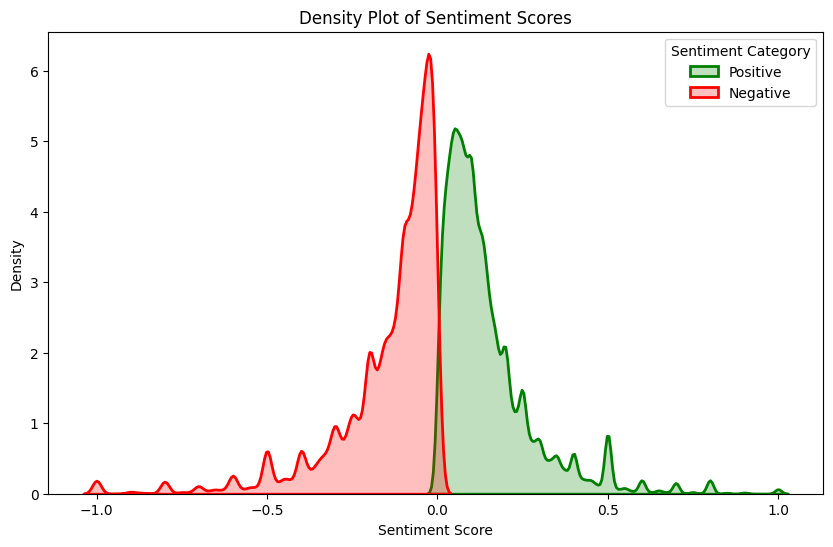

In [20]:
# Define the sentiment categories and corresponding colors
sentiment_categories = df['text_category'].unique()
colors = ['green', 'red', 'yellow']  # You can adjust colors as needed

# Set up the plot
plt.figure(figsize=(10, 6))

# Iterate over sentiment categories and plot KDE
for category, color in zip(sentiment_categories, colors):
    sns.distplot(df[df['text_category'] == category]['text_polarity'], hist=False, kde=True,
                 bins=int(180/5), color=color,
                 hist_kws={'edgecolor': 'black'},
                 kde_kws={'shade': True, 'linewidth': 2}, label=category)

# Set plot labels and legend
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Density Plot of Sentiment Scores')
plt.legend(title='Sentiment Category')

# Show the plot
plt.show()


In [10]:
import random

In [ ]:
main_df[""]

In [29]:
# Neutral posts
main_df[(df['text_category'] == 'Neutral') &  (main_df['self_text'].notnull())
    ].sample(n=5, random_state=random.seed())[['post_title', 'post_self_text', 'post_sentiment', 'post_sentiment_category']]

/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_13943/4002424076.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



KeyError: "['post_sentiment', 'post_sentiment_category'] not in index"